# Prompt Variations Analysis

This notebook analyzes the performance of different prompt variations (P-1 to P-6) for generating PR descriptions and their detectability by AI detection tools. 

**Analysis includes:**
- Statistical comparison of all variations vs Original baseline
- AI detection performance metrics
- Token usage efficiency analysis  
- Text quality metrics
- Comprehensive visualizations and summary tables

**Following copilot instructions:** All analysis compares ALL variations including Original, uses non-parametric tests, and saves results to `analysis/outputs/prompt-variations/`.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import os
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Data Loading and Processing

In [85]:
# Define paths
generation_path = "../generation/datasets/"
detection_path = "../detection/datasets/prompt_variations/prompt_variations-detection.csv"

# Load detection results
print("Loading detection results...")
detection_df = pd.read_csv(detection_path)
print(f"Detection data shape: {detection_df.shape}")
print(f"Detection data columns: {detection_df.columns.tolist()}")
detection_df.head()

Loading detection results...
Detection data shape: (224, 6)
Detection data columns: ['pr_id', 'prompt_variation', 'entry_key', 'entry_type', 'input_text', 'zerogpt_response']


,pr_id,prompt_variation,entry_key,entry_type,input_text,zerogpt_response
0,PR_kwDOAQ0TF85oN6RH,original,PR_kwDOAQ0TF85oN6RH_original,original,<!-- \nDescribe the changes you have made here...,"{""success"": true, ""code"": 200, ""message"": ""det..."
1,PR_kwDOAQ0TF85oN6RH,P-3,PR_kwDOAQ0TF85oN6RH_P-3_generated,generated,Fixed a modularity issue related to the HTML c...,"{""success"": true, ""code"": 200, ""message"": ""det..."
2,MDExOlB1bGxSZXF1ZXN0NTcwMzYyODc2,original,MDExOlB1bGxSZXF1ZXN0NTcwMzYyODc2_original,original,Add zbmath to the public databases which can b...,"{""success"": true, ""code"": 200, ""message"": ""det..."
3,MDExOlB1bGxSZXF1ZXN0NTcwMzYyODc2,P-3,MDExOlB1bGxSZXF1ZXN0NTcwMzYyODc2_P-3_generated,generated,This pull request introduces and enhances the ...,"{""success"": true, ""code"": 200, ""message"": ""det..."
4,PR_kwDOAQ0TF86DGkyK,original,PR_kwDOAQ0TF86DGkyK_original,original,Fixes https://github.com/JabRef/jabref/issues/...,"{""success"": true, ""code"": 200, ""message"": ""det..."


In [86]:
# Find all prompt variation CSV files
prompt_variation_files = glob.glob(os.path.join(generation_path, "prompt_variation_P-*_generated.csv"))
prompt_variation_files.sort()

print(f"Found {len(prompt_variation_files)} prompt variation files:")
for file in prompt_variation_files:
    print(f"  {os.path.basename(file)}")

Found 6 prompt variation files:
  prompt_variation_P-1_generated.csv
  prompt_variation_P-2_generated.csv
  prompt_variation_P-3_generated.csv
  prompt_variation_P-4_generated.csv
  prompt_variation_P-5_generated.csv
  prompt_variation_P-6_generated.csv


In [87]:
# Load and combine all prompt variation data
print("\nLoading prompt variation data...")
all_generation_data = []

for file_path in prompt_variation_files:
    print(f"Loading {os.path.basename(file_path)}...")
    df = pd.read_csv(file_path)
    
    # Extract prompt variation from filename
    filename = os.path.basename(file_path)
    prompt_var = filename.split('_')[2] + '_' + filename.split('_')[3]  # e.g., P-1_Minimal
    
    # Add prompt variation if not present
    if 'prompt_variation' not in df.columns:
        df['prompt_variation'] = prompt_var
    
    print(f"  Shape: {df.shape}, Prompt variation: {df['prompt_variation'].iloc[0] if len(df) > 0 else 'N/A'}")
    all_generation_data.append(df)

# Combine all generation data
generation_df = pd.concat(all_generation_data, ignore_index=True)
print(f"\nCombined generation data shape: {generation_df.shape}")
print(f"Prompt variations found: {sorted(generation_df['prompt_variation'].unique())}")


Loading prompt variation data...
Loading prompt_variation_P-1_generated.csv...
  Shape: (240, 26), Prompt variation: P-1
Loading prompt_variation_P-2_generated.csv...
  Shape: (240, 26), Prompt variation: P-2
Loading prompt_variation_P-3_generated.csv...
  Shape: (240, 26), Prompt variation: P-3
Loading prompt_variation_P-4_generated.csv...
  Shape: (240, 26), Prompt variation: P-2
Loading prompt_variation_P-3_generated.csv...
  Shape: (240, 26), Prompt variation: P-3
Loading prompt_variation_P-4_generated.csv...
  Shape: (240, 26), Prompt variation: P-4
Loading prompt_variation_P-5_generated.csv...
  Shape: (240, 26), Prompt variation: P-5
Loading prompt_variation_P-6_generated.csv...
  Shape: (240, 26), Prompt variation: P-6

Combined generation data shape: (1440, 26)
Prompt variations found: ['P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6']
  Shape: (240, 26), Prompt variation: P-4
Loading prompt_variation_P-5_generated.csv...
  Shape: (240, 26), Prompt variation: P-5
Loading prompt_varia

In [88]:
# Check the structure of generation data
print("Generation data columns:")
print(generation_df.columns.tolist())
print("\nGeneration data sample:")
generation_df.head()

Generation data columns:
['id', 'title', 'description', 'state', 'repository', 'pr_number', 'filename', 'status', 'additions', 'deletions', 'changes', 'sha', 'blob_url', 'raw_url', 'patch', 'file_size_bytes', 'file_content', 'pr_total_size_bytes', 'issue_titles', 'issue_bodies', 'issue_comments', 'generated_description', 'prompt_variation', 'total_input_tokens', 'total_output_tokens', 'total_tokens']

Generation data sample:


,id,title,description,state,repository,pr_number,filename,status,additions,deletions,...,file_content,pr_total_size_bytes,issue_titles,issue_bodies,issue_comments,generated_description,prompt_variation,total_input_tokens,total_output_tokens,total_tokens
0,PR_kwDOAQ0TF85oN6RH,Fix modularity issue with html converter,<!-- \nDescribe the changes you have made here...,MERGED,JabRef/jabref,10943,build.gradle,modified,4,2,...,import org.gradle.internal.os.OperatingSystem\...,28005,issue #10942: Fix: abstract field loses markdo...,"issue #10942: After PR #10896, the abstract fi...",Comment #1 by LoayGhreeb in issue #10942: Ther...,Update build.gradle with minor adjustments inc...,P-1,99,25,124
1,MDExOlB1bGxSZXF1ZXN0NTcwMzYyODc2,Zbmath fetcher,Add zbmath to the public databases which can b...,MERGED,JabRef/jabref,7440,CHANGELOG.md,modified,1,0,...,# Changelog\n\nAll notable changes to this pro...,97657,issue #7437: Enhance bibliographic information...,issue #7437: It is possible to enhance bibliog...,Comment #1 by Siedlerchr in issue #7437: Sound...,Improve the ZbMATH fetcher by enhancing its pa...,P-1,526,129,655
2,MDExOlB1bGxSZXF1ZXN0NTcwMzYyODc2,Zbmath fetcher,Add zbmath to the public databases which can b...,MERGED,JabRef/jabref,7440,src/main/java/org/jabref/logic/importer/EntryB...,modified,11,3,...,package org.jabref.logic.importer;\n\nimport j...,97657,issue #7437: Enhance bibliographic information...,issue #7437: It is possible to enhance bibliog...,Comment #1 by Siedlerchr in issue #7437: Sound...,Improve the ZbMATH fetcher by enhancing its pa...,P-1,526,129,655
3,MDExOlB1bGxSZXF1ZXN0NTcwMzYyODc2,Zbmath fetcher,Add zbmath to the public databases which can b...,MERGED,JabRef/jabref,7440,src/main/java/org/jabref/logic/importer/WebFet...,modified,1,0,...,package org.jabref.logic.importer;\n\nimport j...,97657,issue #7437: Enhance bibliographic information...,issue #7437: It is possible to enhance bibliog...,Comment #1 by Siedlerchr in issue #7437: Sound...,Improve the ZbMATH fetcher by enhancing its pa...,P-1,526,129,655
4,MDExOlB1bGxSZXF1ZXN0NTcwMzYyODc2,Zbmath fetcher,Add zbmath to the public databases which can b...,MERGED,JabRef/jabref,7440,src/main/java/org/jabref/logic/importer/fetche...,modified,62,9,...,package org.jabref.logic.importer.fetcher;\n\n...,97657,issue #7437: Enhance bibliographic information...,issue #7437: It is possible to enhance bibliog...,Comment #1 by Siedlerchr in issue #7437: Sound...,Improve the ZbMATH fetcher by enhancing its pa...,P-1,526,129,655


## Data Merging and Preparation

In [89]:
# Prepare generation data for merging
# Group by PR ID and prompt variation to get unique records (since multiple files per PR have same generated description)
generation_unique = generation_df.groupby(['id', 'prompt_variation']).first().reset_index()
print(f"Generation data after deduplication: {generation_unique.shape}")

# Prepare detection data for merging
print(f"\nDetection data entry types: {detection_df['entry_type'].value_counts()}")
print(f"Detection data prompt variations: {sorted(detection_df['prompt_variation'].unique())}")

Generation data after deduplication: (192, 26)

Detection data entry types: entry_type
generated    192
original      32
Name: count, dtype: int64
Detection data prompt variations: ['P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6', 'original']


In [92]:
# Merge generation and detection data
# For generation data: use id as pr_id
generation_unique['pr_id'] = generation_unique['id']

# Create a complete dataset that includes both generated and original data
# First, get all original entries from detection data
original_detection = detection_df[detection_df['entry_type'] == 'original'].copy()

# Merge generated data with their detection results
generated_merged = pd.merge(
    generation_unique,
    detection_df[detection_df['entry_type'] == 'generated'],
    on=['pr_id', 'prompt_variation'],
    how='inner'
)

# For original data, we need to create a unified structure
# Add the generated columns to original data with appropriate defaults
for col in generation_unique.columns:
    if col not in original_detection.columns:
        if col in ['total_input_tokens', 'total_output_tokens', 'total_tokens']:
            original_detection[col] = 0  # Original has no token usage
        elif col == 'generated_description':
            original_detection[col] = original_detection['input_text']  # Use original text
        else:
            original_detection[col] = None

# Combine generated and original data
merged_df = pd.concat([generated_merged, original_detection], ignore_index=True)

print(f"Merged data shape: {merged_df.shape}")
print(f"Merged data entry types: {merged_df['entry_type'].value_counts()}")
print(f"Merged data prompt variations: {sorted(merged_df['prompt_variation'].unique())}")

Merged data shape: (224, 31)
Merged data entry types: entry_type
generated    192
original      32
Name: count, dtype: int64
Merged data prompt variations: ['P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6', 'original']


## Analysis Functions

In [91]:
def parse_zerogpt_response(response_str):
    """Parse ZeroGPT response to extract AI probability"""
    try:
        if pd.isna(response_str) or response_str == "":
            return None
        
        # Try to parse as JSON
        if isinstance(response_str, str):
            response = json.loads(response_str)
            
            # Handle nested structure - check if there's a 'data' field
            if 'data' in response:
                data = response['data']
                # Use fakePercentage if available, otherwise calculate from isHuman
                if 'fakePercentage' in data:
                    return data['fakePercentage']
                elif 'isHuman' in data:
                    return 100 - data['isHuman']  # Convert isHuman to AI percentage
                else:
                    return None
            else:
                # Direct structure
                if 'fakePercentage' in response:
                    return response['fakePercentage']
                elif 'isHuman' in response:
                    return 100 - response['isHuman']
                else:
                    return None
        else:
            # If it's already a number or can be converted
            return float(response_str)
    except Exception as e:
        print(f"Error parsing response: {e} | Response: {response_str[:100] if isinstance(response_str, str) else response_str}")
        return None

def calculate_detection_metrics(df, ai_threshold=50.0):  # Changed threshold to 50% since we're dealing with percentages
    """Calculate detection accuracy metrics including AI probability statistics"""
    # Parse AI probabilities
    df = df.copy()  # Avoid SettingWithCopyWarning
    df['ai_probability'] = df['zerogpt_response'].apply(parse_zerogpt_response)
    
    # Filter out rows where AI probability couldn't be parsed
    valid_df = df[df['ai_probability'].notna()].copy()
    
    if len(valid_df) == 0:
        return {
            'true_positive_pct': 0, 
            'false_negative_pct': 0, 
            'total_samples': len(df), 
            'valid_samples': 0,
            'mean_ai_score_generated': 0,
            'median_ai_score_generated': 0,
            'mean_ai_score_original': 0,
            'median_ai_score_original': 0
        }
    
    # Determine if detected as AI (above threshold)
    valid_df['detected_as_ai'] = valid_df['ai_probability'] > ai_threshold
    
    # Calculate metrics
    generated_entries = valid_df[valid_df['entry_type'] == 'generated']
    original_entries = valid_df[valid_df['entry_type'] == 'original']
    
    # True Positive Rate: Generated content correctly identified as AI
    tp_rate = 0
    if len(generated_entries) > 0:
        tp_rate = (generated_entries['detected_as_ai'].sum() / len(generated_entries)) * 100
    
    # False Positive Rate: Original content incorrectly identified as AI (this is what we call "false negative" in the context)
    fp_rate = 0
    if len(original_entries) > 0:
        fp_rate = (original_entries['detected_as_ai'].sum() / len(original_entries)) * 100
    
    # AI probability statistics
    mean_ai_generated = generated_entries['ai_probability'].mean() if len(generated_entries) > 0 else 0
    median_ai_generated = generated_entries['ai_probability'].median() if len(generated_entries) > 0 else 0
    mean_ai_original = original_entries['ai_probability'].mean() if len(original_entries) > 0 else 0
    median_ai_original = original_entries['ai_probability'].median() if len(original_entries) > 0 else 0
    
    return {
        'true_positive_pct': tp_rate,
        'false_negative_pct': fp_rate,  # FP on original = FN from human perspective
        'total_samples': len(df),
        'valid_samples': len(valid_df),
        'mean_ai_score_generated': mean_ai_generated,
        'median_ai_score_generated': median_ai_generated,
        'mean_ai_score_original': mean_ai_original,
        'median_ai_score_original': median_ai_original
    }

def calculate_text_metrics(text_series):
    """Calculate text-based metrics"""
    if len(text_series) == 0:
        return {'mean_length': 0, 'median_length': 0}
    
    lengths = text_series.str.len()
    return {
        'mean_length': lengths.mean(),
        'median_length': lengths.median()
    }

## Main Analysis

In [93]:
# Debug: Let's check the merged data structure
print("Debugging merged data structure:")
print(f"Merged data shape: {merged_df.shape}")
print(f"Entry types: {merged_df['entry_type'].value_counts()}")
print(f"Prompt variations: {sorted(merged_df['prompt_variation'].unique())}")

# Check if we have zerogpt_response data
print(f"\nZeroGPT response data availability:")
print(f"Non-null zerogpt_response: {merged_df['zerogpt_response'].notna().sum()}")
print(f"Empty zerogpt_response: {(merged_df['zerogpt_response'] == '').sum()}")

# Look at a sample of zerogpt responses
print("\nSample zerogpt responses:")
sample_responses = merged_df[merged_df['zerogpt_response'].notna() & (merged_df['zerogpt_response'] != '')]['zerogpt_response'].head(3)
for i, resp in enumerate(sample_responses):
    print(f"Sample {i+1}: {resp[:200]}...")

# Now re-analyze with this understanding
analysis_results = []

# Get all prompt variations plus 'Original'
prompt_variations = sorted([pv for pv in merged_df['prompt_variation'].unique() if pv.startswith('P-')])
print(f"\nAnalyzing prompt variations: {prompt_variations}")

# First, analyze 'Original' (using original descriptions from any prompt variation)
print("\nAnalyzing Original descriptions...")
original_data = merged_df[merged_df['entry_type'] == 'original']
print(f"Original data shape: {original_data.shape}")

if len(original_data) > 0:
    # Token metrics - Original doesn't have token usage, so set to 0
    original_metrics = {
        'prompt_variation': 'Original',
        'mean_prompt_tokens': 0,
        'median_prompt_tokens': 0,
        'mean_completion_tokens': 0,
        'median_completion_tokens': 0
    }
    
    # Text metrics
    text_metrics = calculate_text_metrics(original_data['input_text'])
    original_metrics.update({
        'mean_description_length': text_metrics['mean_length'],
        'median_description_length': text_metrics['median_length']
    })
    
    # Detection metrics (including new AI probability metrics)
    detection_metrics = calculate_detection_metrics(original_data)
    original_metrics.update({
        'true_positive_pct': detection_metrics['true_positive_pct'],
        'false_negative_pct': detection_metrics['false_negative_pct'],
        'mean_ai_score_generated': detection_metrics['mean_ai_score_generated'],
        'median_ai_score_generated': detection_metrics['median_ai_score_generated'],
        'mean_ai_score_original': detection_metrics['mean_ai_score_original'],
        'median_ai_score_original': detection_metrics['median_ai_score_original'],
        'total_samples': detection_metrics['total_samples'],
        'valid_samples': detection_metrics['valid_samples']
    })
    
    analysis_results.append(original_metrics)
    print(f"  Total samples: {detection_metrics['total_samples']}")
    print(f"  Valid samples: {detection_metrics['valid_samples']}")
    print(f"  Mean description length: {text_metrics['mean_length']:.1f}")
    print(f"  False negative rate: {detection_metrics['false_negative_pct']:.1f}%")
    print(f"  Mean AI score (original): {detection_metrics['mean_ai_score_original']:.1f}%")
    print(f"  Median AI score (original): {detection_metrics['median_ai_score_original']:.1f}%")

Debugging merged data structure:
Merged data shape: (224, 31)
Entry types: entry_type
generated    192
original      32
Name: count, dtype: int64
Prompt variations: ['P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6', 'original']

ZeroGPT response data availability:
Non-null zerogpt_response: 224
Empty zerogpt_response: 0

Sample zerogpt responses:
Sample 1: {"success": true, "code": 200, "message": "detection result passed to proxy", "data": {"sentences": [], "isHuman": 100, "additional_feedback": "Please input more text for a more accurate result", "h":...
Sample 2: {"success": true, "code": 200, "message": "detection result passed to proxy", "data": {"sentences": [], "isHuman": 62.5, "additional_feedback": "", "h": ["These changes likely improve or fix functiona...
Sample 3: {"success": true, "code": 200, "message": "detection result passed to proxy", "data": {"sentences": [], "isHuman": 100, "additional_feedback": "", "h": [], "hi": [], "textWords": 44, "aiWords": 0, "fa...

Analyzing prompt

In [94]:
# Now analyze each prompt variation
for pv in prompt_variations:
    print(f"\nAnalyzing {pv}...")
    
    # Get data for this prompt variation
    pv_data = merged_df[merged_df['prompt_variation'] == pv]
    
    if len(pv_data) == 0:
        print(f"  No data found for {pv}")
        continue
    
    # Get generation data for token metrics (only generated entries have token info)
    pv_generated = pv_data[pv_data['entry_type'] == 'generated']
    
    pv_metrics = {'prompt_variation': pv}
    
    # Token metrics
    if len(pv_generated) > 0 and 'total_input_tokens' in pv_generated.columns:
        pv_metrics.update({
            'mean_prompt_tokens': pv_generated['total_input_tokens'].mean(),
            'median_prompt_tokens': pv_generated['total_input_tokens'].median(),
            'mean_completion_tokens': pv_generated['total_output_tokens'].mean(),
            'median_completion_tokens': pv_generated['total_output_tokens'].median()
        })
    else:
        pv_metrics.update({
            'mean_prompt_tokens': 0,
            'median_prompt_tokens': 0,
            'mean_completion_tokens': 0,
            'median_completion_tokens': 0
        })
    
    # Text metrics (using generated descriptions)
    if len(pv_generated) > 0:
        text_metrics = calculate_text_metrics(pv_generated['input_text'])
        pv_metrics.update({
            'mean_description_length': text_metrics['mean_length'],
            'median_description_length': text_metrics['median_length']
        })
    else:
        pv_metrics.update({
            'mean_description_length': 0,
            'median_description_length': 0
        })
    
    # Detection metrics (using both original and generated, including new AI probability metrics)
    detection_metrics = calculate_detection_metrics(pv_data)
    pv_metrics.update({
        'true_positive_pct': detection_metrics['true_positive_pct'],
        'false_negative_pct': detection_metrics['false_negative_pct'],
        'mean_ai_score_generated': detection_metrics['mean_ai_score_generated'],
        'median_ai_score_generated': detection_metrics['median_ai_score_generated'],
        'mean_ai_score_original': detection_metrics['mean_ai_score_original'],
        'median_ai_score_original': detection_metrics['median_ai_score_original'],
        'total_samples': detection_metrics['total_samples']
    })
    
    analysis_results.append(pv_metrics)
    
    print(f"  Samples: {detection_metrics['total_samples']} (Generated: {len(pv_generated)})")
    print(f"  Mean prompt tokens: {pv_metrics['mean_prompt_tokens']:.0f}")
    print(f"  Mean completion tokens: {pv_metrics['mean_completion_tokens']:.0f}")
    print(f"  Mean description length: {pv_metrics['mean_description_length']:.1f}")
    print(f"  True positive rate: {detection_metrics['true_positive_pct']:.1f}%")
    print(f"  False negative rate: {detection_metrics['false_negative_pct']:.1f}%")
    print(f"  Mean AI score (generated): {detection_metrics['mean_ai_score_generated']:.1f}%")
    print(f"  Mean AI score (original): {detection_metrics['mean_ai_score_original']:.1f}%")


Analyzing P-1...
  Samples: 32 (Generated: 32)
  Mean prompt tokens: 568
  Mean completion tokens: 131
  Mean description length: 353.2
  True positive rate: 3.1%
  False negative rate: 0.0%
  Mean AI score (generated): 5.3%
  Mean AI score (original): 0.0%

Analyzing P-2...
  Samples: 32 (Generated: 32)
  Mean prompt tokens: 1824
  Mean completion tokens: 240
  Mean description length: 629.9
  True positive rate: 15.6%
  False negative rate: 0.0%
  Mean AI score (generated): 23.2%
  Mean AI score (original): 0.0%

Analyzing P-3...
  Samples: 32 (Generated: 32)
  Mean prompt tokens: 1879
  Mean completion tokens: 257
  Mean description length: 599.9
  True positive rate: 18.8%
  False negative rate: 0.0%
  Mean AI score (generated): 19.9%
  Mean AI score (original): 0.0%

Analyzing P-4...
  Samples: 32 (Generated: 32)
  Mean prompt tokens: 6792
  Mean completion tokens: 308
  Mean description length: 730.9
  True positive rate: 9.4%
  False negative rate: 0.0%
  Mean AI score (generat

## Results Summary Table

In [95]:
# Create results dataframe
results_df = pd.DataFrame(analysis_results)

# Reorder columns as requested, including new AI probability metrics
column_order = [
    'prompt_variation',
    'mean_prompt_tokens',
    'median_prompt_tokens', 
    'mean_completion_tokens',
    'median_completion_tokens',
    'mean_description_length',
    'median_description_length',
    'true_positive_pct',
    'false_negative_pct',
    'mean_ai_score_generated',
    'median_ai_score_generated',
    'mean_ai_score_original',
    'median_ai_score_original',
    'total_samples'
]

results_df = results_df[column_order]

# Round numeric columns for better display
numeric_cols = [col for col in results_df.columns if col != 'prompt_variation']
results_df[numeric_cols] = results_df[numeric_cols].round(1)

print("\n=== PROMPT VARIATIONS ANALYSIS RESULTS ===")
print("\nTarget Output Table with AI Probability Scores:")
print("=" * 160)

# Display the table
results_df


=== PROMPT VARIATIONS ANALYSIS RESULTS ===

Target Output Table with AI Probability Scores:


,prompt_variation,mean_prompt_tokens,median_prompt_tokens,mean_completion_tokens,median_completion_tokens,mean_description_length,median_description_length,true_positive_pct,false_negative_pct,mean_ai_score_generated,median_ai_score_generated,mean_ai_score_original,median_ai_score_original,total_samples
0,Original,0.0,0.0,0.0,0.0,1184.0,1187.5,0.0,0.0,0.0,0.0,13.5,9.9,32
1,P-1,567.7,353.5,130.5,69.0,353.2,237.0,3.1,0.0,5.3,0.0,0.0,0.0,32
2,P-2,1824.2,1148.5,239.6,147.5,629.9,499.5,15.6,0.0,23.2,3.7,0.0,0.0,32
3,P-3,1879.2,1164.5,256.8,147.5,599.9,491.0,18.8,0.0,19.9,0.0,0.0,0.0,32
4,P-4,6791.9,2784.0,308.0,156.0,730.9,560.5,9.4,0.0,12.2,0.0,0.0,0.0,32
5,P-5,57733.9,25207.5,329.2,159.5,801.7,671.5,9.4,0.0,9.2,0.0,0.0,0.0,32
6,P-6,59090.2,25500.5,335.4,195.0,769.2,644.0,12.5,0.0,13.9,0.0,0.0,0.0,32


In [96]:
# Save results to CSV
output_file = "prompt_variations_analysis_results.csv"
results_df.to_csv(output_file, index=False)
print(f"\nResults saved to: {output_file}")

# Display summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Total prompt variations analyzed: {len(results_df)}")
print(f"Best performing prompt (highest true positive rate): {results_df.loc[results_df['true_positive_pct'].idxmax(), 'prompt_variation']}")
print(f"Most efficient prompt (lowest mean prompt tokens): {results_df[results_df['prompt_variation'] != 'Original'].loc[results_df[results_df['prompt_variation'] != 'Original']['mean_prompt_tokens'].idxmin(), 'prompt_variation']}")
print(f"Longest descriptions (highest mean length): {results_df.loc[results_df['mean_description_length'].idxmax(), 'prompt_variation']}")


Results saved to: prompt_variations_analysis_results.csv

=== SUMMARY STATISTICS ===
Total prompt variations analyzed: 7
Best performing prompt (highest true positive rate): P-3
Most efficient prompt (lowest mean prompt tokens): P-1
Longest descriptions (highest mean length): Original


## Extended Text Metrics

Additional text-based features for comprehensive analysis.

In [97]:
def extract_zerogpt_text_metrics(response_str):
    """Extract textual metrics from ZeroGPT response"""
    try:
        if pd.isna(response_str) or response_str == "":
            return {'textWords': None, 'aiWords': None, 'word_count': None}
        
        response = json.loads(response_str)
        
        if 'data' in response:
            data = response['data']
            return {
                'textWords': data.get('textWords', None),
                'aiWords': data.get('aiWords', None),
                'word_count': data.get('textWords', None)  # Same as textWords
            }
        else:
            return {'textWords': None, 'aiWords': None, 'word_count': None}
    except:
        return {'textWords': None, 'aiWords': None, 'word_count': None}

def calculate_extended_text_metrics(df):
    """Calculate extended textual metrics"""
    if len(df) == 0:
        return {}
    
    # Basic length metrics
    lengths = df['input_text'].str.len()
    
    # Extract ZeroGPT word counts
    zerogpt_metrics = df['zerogpt_response'].apply(extract_zerogpt_text_metrics)
    word_counts = pd.DataFrame(zerogpt_metrics.tolist())['textWords'].dropna()
    
    # Calculate sentences (approximate by counting periods, exclamation marks, question marks)
    sentence_counts = df['input_text'].str.count(r'[.!?]+')
    
    # Calculate newlines (as a proxy for paragraph structure)
    newline_counts = df['input_text'].str.count(r'\\n')
    
    return {
        'mean_char_length': lengths.mean(),
        'median_char_length': lengths.median(),
        'mean_word_count': word_counts.mean() if len(word_counts) > 0 else 0,
        'median_word_count': word_counts.median() if len(word_counts) > 0 else 0,
        'mean_sentence_count': sentence_counts.mean(),
        'median_sentence_count': sentence_counts.median(),
        'mean_newline_count': newline_counts.mean(),
        'median_newline_count': newline_counts.median()
    }

print("Extended textual analysis functions defined.")

Extended textual analysis functions defined.


In [98]:
# Extended textual analysis for each prompt variation
print("=== EXTENDED TEXTUAL ANALYSIS ===\\n")

extended_analysis_results = []

# Analyze Original
original_data = merged_df[merged_df['entry_type'] == 'original']
if len(original_data) > 0:
    ext_metrics = calculate_extended_text_metrics(original_data)
    ext_metrics['prompt_variation'] = 'Original'
    extended_analysis_results.append(ext_metrics)
    print(f"Original - Samples: {len(original_data)}")
    print(f"  Mean words: {ext_metrics['mean_word_count']:.1f}")
    print(f"  Mean sentences: {ext_metrics['mean_sentence_count']:.1f}")
    print(f"  Mean newlines: {ext_metrics['mean_newline_count']:.1f}\\n")

# Analyze each prompt variation
for pv in prompt_variations:
    pv_data = merged_df[merged_df['prompt_variation'] == pv]
    pv_generated = pv_data[pv_data['entry_type'] == 'generated']
    
    if len(pv_generated) > 0:
        ext_metrics = calculate_extended_text_metrics(pv_generated)
        ext_metrics['prompt_variation'] = pv
        extended_analysis_results.append(ext_metrics)
        print(f"{pv} - Samples: {len(pv_generated)}")
        print(f"  Mean words: {ext_metrics['mean_word_count']:.1f}")
        print(f"  Mean sentences: {ext_metrics['mean_sentence_count']:.1f}")
        print(f"  Mean newlines: {ext_metrics['mean_newline_count']:.1f}\\n")

=== EXTENDED TEXTUAL ANALYSIS ===\n
Original - Samples: 32
  Mean words: 160.7
  Mean sentences: 19.8
  Mean newlines: 0.0\n
P-1 - Samples: 32
  Mean words: 46.3
  Mean sentences: 3.8
  Mean newlines: 0.0\n
P-2 - Samples: 32
  Mean words: 82.8
  Mean sentences: 5.8
  Mean newlines: 0.0\n
P-3 - Samples: 32
  Mean words: 79.9
  Mean sentences: 5.3
  Mean newlines: 0.0\n
P-4 - Samples: 32
  Mean words: 101.0
  Mean sentences: 5.5
  Mean newlines: 0.0\n
P-5 - Samples: 32
  Mean words: 110.9
  Mean sentences: 6.7
  Mean newlines: 0.0\n
P-6 - Samples: 32
  Mean words: 109.3
  Mean sentences: 6.5
  Mean newlines: 0.0\n


In [99]:
# Create extended results DataFrame
extended_results_df = pd.DataFrame(extended_analysis_results)

# Merge with original results
final_results = pd.merge(results_df, extended_results_df, on='prompt_variation', how='left')

# Reorder columns for the final comprehensive table
final_column_order = [
    'prompt_variation',
    'mean_prompt_tokens',
    'median_prompt_tokens', 
    'mean_completion_tokens',
    'median_completion_tokens',
    'mean_description_length',
    'median_description_length',
    'mean_word_count',
    'median_word_count',
    'mean_sentence_count',
    'median_sentence_count',
    'true_positive_pct',
    'false_negative_pct',
    'mean_ai_score_generated',
    'median_ai_score_generated',
    'mean_ai_score_original',
    'median_ai_score_original',
    'total_samples'
]

final_results = final_results[final_column_order]

# Round numeric columns for better display
numeric_cols = [col for col in final_results.columns if col != 'prompt_variation']
final_results[numeric_cols] = final_results[numeric_cols].round(1)

print("\n=== COMPREHENSIVE ANALYSIS RESULTS ===\n")
print("Final Table with Textual Features and AI Probability Scores:")
print("=" * 180)

# Display the table
final_results


=== COMPREHENSIVE ANALYSIS RESULTS ===

Final Table with Textual Features and AI Probability Scores:


,prompt_variation,mean_prompt_tokens,median_prompt_tokens,mean_completion_tokens,median_completion_tokens,mean_description_length,median_description_length,mean_word_count,median_word_count,mean_sentence_count,median_sentence_count,true_positive_pct,false_negative_pct,mean_ai_score_generated,median_ai_score_generated,mean_ai_score_original,median_ai_score_original,total_samples
0,Original,0.0,0.0,0.0,0.0,1184.0,1187.5,160.7,169.0,19.8,19.0,0.0,0.0,0.0,0.0,13.5,9.9,32
1,P-1,567.7,353.5,130.5,69.0,353.2,237.0,46.3,28.5,3.8,3.0,3.1,0.0,5.3,0.0,0.0,0.0,32
2,P-2,1824.2,1148.5,239.6,147.5,629.9,499.5,82.8,71.0,5.8,5.0,15.6,0.0,23.2,3.7,0.0,0.0,32
3,P-3,1879.2,1164.5,256.8,147.5,599.9,491.0,79.9,71.0,5.3,5.0,18.8,0.0,19.9,0.0,0.0,0.0,32
4,P-4,6791.9,2784.0,308.0,156.0,730.9,560.5,101.0,76.0,5.5,5.0,9.4,0.0,12.2,0.0,0.0,0.0,32
5,P-5,57733.9,25207.5,329.2,159.5,801.7,671.5,110.9,84.0,6.7,6.0,9.4,0.0,9.2,0.0,0.0,0.0,32
6,P-6,59090.2,25500.5,335.4,195.0,769.2,644.0,109.3,89.5,6.5,6.0,12.5,0.0,13.9,0.0,0.0,0.0,32


In [105]:
# Create output directory following copilot instructions
import os
output_dir = "outputs/prompt-variations"
os.makedirs(output_dir, exist_ok=True)

# Save comprehensive results
comprehensive_output_file = f"{output_dir}/comprehensive_prompt_variations_analysis.csv"
final_results.to_csv(comprehensive_output_file, index=False)
print(f"\nComprehensive results saved to: {comprehensive_output_file}")

# Also save the basic results
basic_output_file = f"{output_dir}/prompt_variations_analysis_results.csv"
results_df.to_csv(basic_output_file, index=False)
print(f"Basic results saved to: {basic_output_file}")

# Final comprehensive summary
print("\n=== FINAL COMPREHENSIVE SUMMARY ===")
print(f"Total prompt variations analyzed: {len(final_results)}")

# Best performers
best_detection = final_results.loc[final_results['true_positive_pct'].idxmax()]
generated_only = final_results[final_results['prompt_variation'] != 'Original']
most_efficient = generated_only.loc[generated_only['mean_prompt_tokens'].idxmin()]
longest_content = final_results.loc[final_results['mean_description_length'].idxmax()]
most_words = final_results.loc[final_results['mean_word_count'].idxmax()]
highest_ai_score = final_results.loc[final_results['mean_ai_score_generated'].idxmax()]

print(f"\nBest detection performance: {best_detection['prompt_variation']} ({best_detection['true_positive_pct']:.1f}% true positive rate)")
print(f"Most efficient (lowest tokens): {most_efficient['prompt_variation']} ({most_efficient['mean_prompt_tokens']:.0f} mean prompt tokens)")
print(f"Longest descriptions: {longest_content['prompt_variation']} ({longest_content['mean_description_length']:.0f} chars)")
print(f"Most words per description: {most_words['prompt_variation']} ({most_words['mean_word_count']:.1f} words)")
print(f"Highest AI detectability: {highest_ai_score['prompt_variation']} ({highest_ai_score['mean_ai_score_generated']:.1f}% mean AI score)")


Comprehensive results saved to: outputs/prompt-variations/comprehensive_prompt_variations_analysis.csv
Basic results saved to: outputs/prompt-variations/prompt_variations_analysis_results.csv

=== FINAL COMPREHENSIVE SUMMARY ===
Total prompt variations analyzed: 7

Best detection performance: P-3 (18.8% true positive rate)
Most efficient (lowest tokens): P-1 (568 mean prompt tokens)
Longest descriptions: Original (1184 chars)
Most words per description: Original (160.7 words)
Highest AI detectability: P-2 (23.2% mean AI score)


## Statistical Analysis

Following the copilot instructions, we'll perform statistical tests to compare ALL variations including Original.

In [100]:
from scipy import stats
import numpy as np

def cohens_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    
    # Cohen's d
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    return d

def perform_statistical_analysis(merged_df, feature_col, feature_name):
    """Perform statistical analysis following copilot instructions"""
    print(f"\n=== STATISTICAL ANALYSIS: {feature_name.upper()} ===")
    
    # Prepare data with variation_label as specified in copilot instructions
    analysis_data = merged_df.copy()
    analysis_data['variation_label'] = analysis_data.apply(
        lambda row: 'Original' if row['entry_type'] == 'original' else row['prompt_variation'], axis=1
    )
    
    # Get all variations including Original
    variations = ['Original'] + sorted([v for v in analysis_data['variation_label'].unique() if v.startswith('P-')])
    
    # Extract data for each variation
    groups = []
    group_stats = {}
    
    for var in variations:
        if var == 'Original':
            var_data = analysis_data[analysis_data['variation_label'] == var][feature_col].dropna()
        else:
            # For generated variations, use only generated entries
            var_data = analysis_data[
                (analysis_data['variation_label'] == var) & 
                (analysis_data['entry_type'] == 'generated')
            ][feature_col].dropna()
        
        if len(var_data) > 0:
            groups.append(var_data)
            group_stats[var] = {
                'mean': var_data.mean(),
                'std': var_data.std(),
                'median': var_data.median(),
                'n': len(var_data)
            }
        
        print(f"{var}: n={len(var_data)}, mean={var_data.mean():.2f}, std={var_data.std():.2f}")
    
    # Kruskal-Wallis test (non-parametric as specified in copilot instructions)
    if len(groups) > 1:
        h_stat, p_value = stats.kruskal(*groups)
        print(f"\nKruskal-Wallis Test:")
        print(f"  H-statistic: {h_stat:.4f}")
        print(f"  p-value: {p_value:.6f}")
        print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")
    
    # Effect sizes (Cohen's d) vs Original baseline
    effect_sizes = {}
    if 'Original' in group_stats:
        original_data = analysis_data[analysis_data['variation_label'] == 'Original'][feature_col].dropna()
        
        for var in variations[1:]:  # Skip Original
            var_data = analysis_data[
                (analysis_data['variation_label'] == var) & 
                (analysis_data['entry_type'] == 'generated')
            ][feature_col].dropna()
            
            if len(var_data) > 0 and len(original_data) > 0:
                d = cohens_d(var_data, original_data)
                effect_sizes[var] = d
                
                # Interpret effect size
                if abs(d) < 0.2:
                    interpretation = "negligible"
                elif abs(d) < 0.5:
                    interpretation = "small"
                elif abs(d) < 0.8:
                    interpretation = "medium"
                else:
                    interpretation = "large"
                
                print(f"{var} vs Original: Cohen's d = {d:.3f} ({interpretation})")
    
    return {
        'h_statistic': h_stat if len(groups) > 1 else None,
        'p_value': p_value if len(groups) > 1 else None,
        'effect_sizes': effect_sizes,
        'group_stats': group_stats,
        'variations': variations
    }

In [102]:
# Perform statistical analysis on key metrics
statistical_results = {}

# First, let's add AI probabilities to merged_df for analysis
merged_df['ai_probability'] = merged_df['zerogpt_response'].apply(parse_zerogpt_response)

# Add text length as a numeric column for analysis
merged_df['text_length'] = merged_df['input_text'].str.len()

# Text length analysis
text_length_results = perform_statistical_analysis(merged_df, 'text_length', 'Text Length')
text_length_results['feature'] = 'text_length'
statistical_results['text_length'] = text_length_results

# AI Detection Score analysis (most important metric)
ai_score_results = perform_statistical_analysis(merged_df, 'ai_probability', 'AI Detection Score')
ai_score_results['feature'] = 'ai_detection_score'
statistical_results['ai_detection_score'] = ai_score_results

# Token usage analysis (for generated content only)
generated_df = merged_df[merged_df['entry_type'] == 'generated'].copy()
if 'total_input_tokens' in generated_df.columns:
    input_token_results = perform_statistical_analysis(generated_df, 'total_input_tokens', 'Input Tokens')
    input_token_results['feature'] = 'input_tokens'
    statistical_results['input_tokens'] = input_token_results

if 'total_output_tokens' in generated_df.columns:
    output_token_results = perform_statistical_analysis(generated_df, 'total_output_tokens', 'Output Tokens')
    output_token_results['feature'] = 'output_tokens'
    statistical_results['output_tokens'] = output_token_results


=== STATISTICAL ANALYSIS: TEXT LENGTH ===
Original: n=32, mean=1184.00, std=764.22
P-1: n=32, mean=353.16, std=314.83
P-2: n=32, mean=629.94, std=477.94
P-3: n=32, mean=599.91, std=423.32
P-4: n=32, mean=730.94, std=527.53
P-5: n=32, mean=801.66, std=618.45
P-6: n=32, mean=769.16, std=444.77

Kruskal-Wallis Test:
  H-statistic: 38.8677
  p-value: 0.000001
  Significant: Yes
P-1 vs Original: Cohen's d = -1.422 (large)
P-2 vs Original: Cohen's d = -0.869 (large)
P-3 vs Original: Cohen's d = -0.946 (large)
P-4 vs Original: Cohen's d = -0.690 (medium)
P-5 vs Original: Cohen's d = -0.550 (medium)
P-6 vs Original: Cohen's d = -0.663 (medium)

=== STATISTICAL ANALYSIS: AI DETECTION SCORE ===
Original: n=32, mean=13.46, std=14.96
P-1: n=32, mean=5.28, std=14.52
P-2: n=32, mean=23.19, std=29.67
P-3: n=32, mean=19.92, std=29.68
P-4: n=32, mean=12.21, std=23.46
P-5: n=32, mean=9.25, std=17.94
P-6: n=32, mean=13.88, std=25.77

Kruskal-Wallis Test:
  H-statistic: 15.2463
  p-value: 0.018425
  Sign

## Visualizations

Create key visualizations comparing all variations including Original baseline.

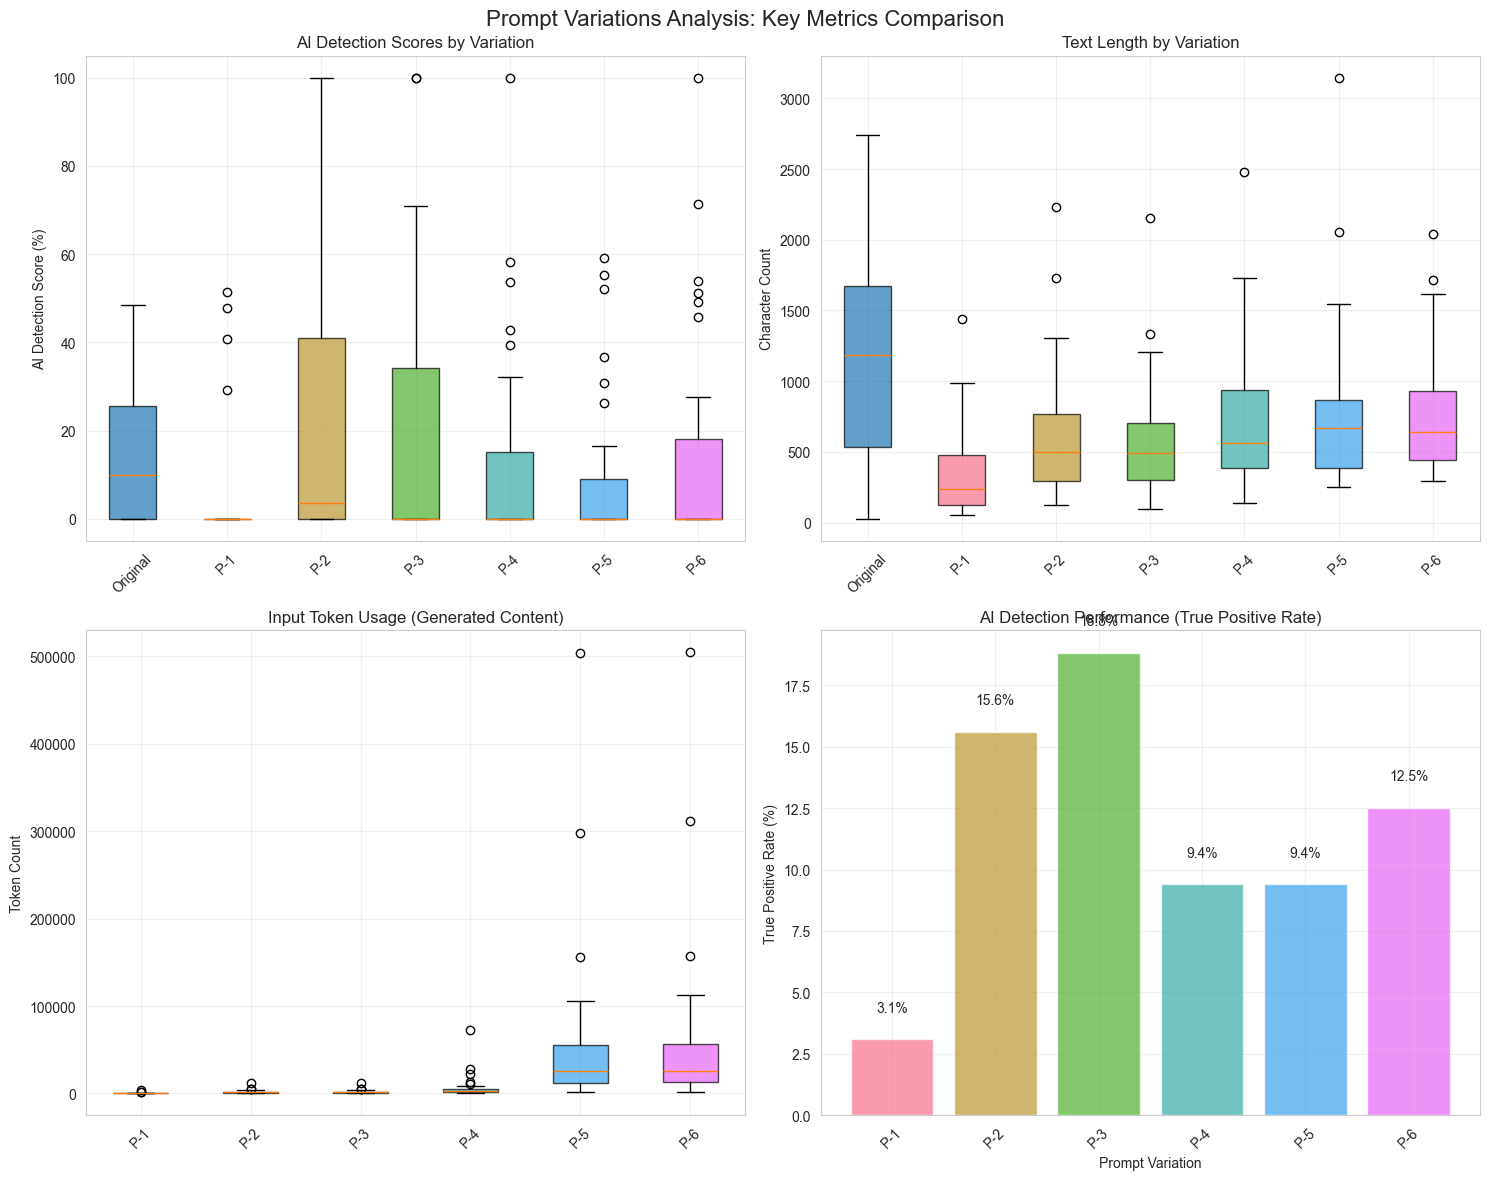

In [107]:
# Create visualizations for key metrics
import os
output_dir = "outputs/prompt-variations"
os.makedirs(output_dir, exist_ok=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Prompt Variations Analysis: Key Metrics Comparison', fontsize=16, y=0.98)

# Prepare data with variation labels
viz_data = merged_df.copy()
viz_data['variation_label'] = viz_data.apply(
    lambda row: 'Original' if row['entry_type'] == 'original' else row['prompt_variation'], axis=1
)

# Define consistent color palette
variation_order = ['Original'] + sorted([v for v in viz_data['variation_label'].unique() if v.startswith('P-')])
colors = ['#1f77b4'] + sns.color_palette("husl", len(variation_order)-1)  # Blue for Original, distinct colors for others

# 1. AI Detection Scores Boxplot
ax1 = axes[0, 0]
ai_score_data = []
ai_score_labels = []
for var in variation_order:
    if var == 'Original':
        var_scores = viz_data[viz_data['variation_label'] == var]['ai_probability'].dropna()
    else:
        var_scores = viz_data[
            (viz_data['variation_label'] == var) & 
            (viz_data['entry_type'] == 'generated')
        ]['ai_probability'].dropna()
    
    if len(var_scores) > 0:
        ai_score_data.append(var_scores)
        ai_score_labels.append(var)

box_plot = ax1.boxplot(ai_score_data, tick_labels=ai_score_labels, patch_artist=True)
for patch, color in zip(box_plot['boxes'], colors[:len(ai_score_labels)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('AI Detection Scores by Variation')
ax1.set_ylabel('AI Detection Score (%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 2. Text Length Comparison
ax2 = axes[0, 1]
length_data = []
length_labels = []
for var in variation_order:
    if var == 'Original':
        var_lengths = viz_data[viz_data['variation_label'] == var]['text_length'].dropna()
    else:
        var_lengths = viz_data[
            (viz_data['variation_label'] == var) & 
            (viz_data['entry_type'] == 'generated')
        ]['text_length'].dropna()
    
    if len(var_lengths) > 0:
        length_data.append(var_lengths)
        length_labels.append(var)

box_plot2 = ax2.boxplot(length_data, tick_labels=length_labels, patch_artist=True)
for patch, color in zip(box_plot2['boxes'], colors[:len(length_labels)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Text Length by Variation')
ax2.set_ylabel('Character Count')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 3. Token Usage (Generated only)
ax3 = axes[1, 0]
if 'total_input_tokens' in merged_df.columns:
    token_data = []
    token_labels = []
    generated_variations = sorted([v for v in viz_data['variation_label'].unique() if v.startswith('P-')])
    
    for var in generated_variations:
        var_tokens = viz_data[
            (viz_data['variation_label'] == var) & 
            (viz_data['entry_type'] == 'generated')
        ]['total_input_tokens'].dropna()
        
        if len(var_tokens) > 0:
            token_data.append(var_tokens)
            token_labels.append(var)
    
    if token_data:
        box_plot3 = ax3.boxplot(token_data, tick_labels=token_labels, patch_artist=True)
        for patch, color in zip(box_plot3['boxes'], colors[1:len(token_labels)+1]):  # Skip Original color
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax3.set_title('Input Token Usage (Generated Content)')
        ax3.set_ylabel('Token Count')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'No token data available', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Input Token Usage (Generated Content)')
else:
    ax3.text(0.5, 0.5, 'No token data available', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Input Token Usage (Generated Content)')

# 4. Detection Performance Bar Chart
ax4 = axes[1, 1]
performance_data = final_results[final_results['prompt_variation'] != 'Original'].copy()
if len(performance_data) > 0:
    bars = ax4.bar(range(len(performance_data)), 
                   performance_data['true_positive_pct'], 
                   color=colors[1:len(performance_data)+1], alpha=0.7)
    ax4.set_title('AI Detection Performance (True Positive Rate)')
    ax4.set_ylabel('True Positive Rate (%)')
    ax4.set_xlabel('Prompt Variation')
    ax4.set_xticks(range(len(performance_data)))
    ax4.set_xticklabels(performance_data['prompt_variation'], rotation=45)
    ax4.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')
else:
    ax4.text(0.5, 0.5, 'No detection data available', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('AI Detection Performance (True Positive Rate)')

plt.tight_layout()
plt.savefig(f'{output_dir}/prompt_variations_analysis_overview.png', dpi=300, bbox_inches='tight')
plt.show()

In [106]:
# Generate summary tables for publication following copilot instructions
print("\n=== GENERATING SUMMARY TABLES ===")

# 1. Descriptive Statistics Table
descriptive_stats = []
for var in variation_order:
    if var == 'Original':
        var_data = viz_data[viz_data['variation_label'] == var]
        ai_scores = var_data['ai_probability'].dropna()
        text_lengths = var_data['input_text'].str.len().dropna()
        
        descriptive_stats.append({
            'Variation': var,
            'N_Samples': len(var_data),
            'Mean_AI_Score': ai_scores.mean() if len(ai_scores) > 0 else 0,
            'Std_AI_Score': ai_scores.std() if len(ai_scores) > 0 else 0,
            'Mean_Text_Length': text_lengths.mean() if len(text_lengths) > 0 else 0,
            'Std_Text_Length': text_lengths.std() if len(text_lengths) > 0 else 0,
            'Mean_Input_Tokens': 0,  # Original doesn't have token data
            'Mean_Output_Tokens': 0
        })
    else:
        var_data = viz_data[
            (viz_data['variation_label'] == var) & 
            (viz_data['entry_type'] == 'generated')
        ]
        
        if len(var_data) > 0:
            ai_scores = var_data['ai_probability'].dropna()
            text_lengths = var_data['input_text'].str.len().dropna()
            input_tokens = var_data['total_input_tokens'].dropna() if 'total_input_tokens' in var_data.columns else []
            output_tokens = var_data['total_output_tokens'].dropna() if 'total_output_tokens' in var_data.columns else []
            
            descriptive_stats.append({
                'Variation': var,
                'N_Samples': len(var_data),
                'Mean_AI_Score': ai_scores.mean() if len(ai_scores) > 0 else 0,
                'Std_AI_Score': ai_scores.std() if len(ai_scores) > 0 else 0,
                'Mean_Text_Length': text_lengths.mean() if len(text_lengths) > 0 else 0,
                'Std_Text_Length': text_lengths.std() if len(text_lengths) > 0 else 0,
                'Mean_Input_Tokens': input_tokens.mean() if len(input_tokens) > 0 else 0,
                'Mean_Output_Tokens': output_tokens.mean() if len(output_tokens) > 0 else 0
            })

descriptive_df = pd.DataFrame(descriptive_stats)
descriptive_df = descriptive_df.round(2)

# Save descriptive statistics
descriptive_df.to_csv(f'{output_dir}/descriptive_statistics.csv', index=False)
print("Descriptive statistics:")
print(descriptive_df.to_string(index=False))

# 2. Statistical Test Results Table
if statistical_results:
    stats_summary = []
    for feature, results in statistical_results.items():
        if results.get('h_statistic') is not None:
            stats_summary.append({
                'Feature': feature.replace('_', ' ').title(),
                'H_Statistic': f"{results['h_statistic']:.4f}",
                'P_Value': f"{results['p_value']:.6f}",
                'Significant': 'Yes' if results['p_value'] < 0.05 else 'No'
            })
    
    if stats_summary:
        stats_df = pd.DataFrame(stats_summary)
        stats_df.to_csv(f'{output_dir}/statistical_test_results.csv', index=False)
        print(f"\nStatistical test results:")
        print(stats_df.to_string(index=False))

# 3. Effect Sizes Table (Cohen's d vs Original)
effect_sizes_summary = []
for feature, results in statistical_results.items():
    if 'effect_sizes' in results:
        for var, effect_size in results['effect_sizes'].items():
            # Interpret effect size
            abs_d = abs(effect_size)
            if abs_d < 0.2:
                interpretation = "Negligible"
            elif abs_d < 0.5:
                interpretation = "Small"
            elif abs_d < 0.8:
                interpretation = "Medium"
            else:
                interpretation = "Large"
            
            effect_sizes_summary.append({
                'Feature': feature.replace('_', ' ').title(),
                'Variation': var,
                'Cohens_D': f"{effect_size:.3f}",
                'Interpretation': interpretation,
                'Direction': 'Higher' if effect_size > 0 else 'Lower'
            })

if effect_sizes_summary:
    effect_sizes_df = pd.DataFrame(effect_sizes_summary)
    effect_sizes_df.to_csv(f'{output_dir}/effect_sizes_vs_original.csv', index=False)
    print(f"\nEffect sizes (vs Original):")
    print(effect_sizes_df.to_string(index=False))

print(f"\n=== ALL OUTPUT FILES SAVED TO: {output_dir}/ ===")
print("Files generated:")
print(f"- {comprehensive_output_file}")
print(f"- {basic_output_file}")
print(f"- {output_dir}/descriptive_statistics.csv")
print(f"- {output_dir}/prompt_variations_analysis_overview.png")
if 'stats_df' in locals():
    print(f"- {output_dir}/statistical_test_results.csv")
if 'effect_sizes_df' in locals():
    print(f"- {output_dir}/effect_sizes_vs_original.csv")


=== GENERATING SUMMARY TABLES ===
Descriptive statistics:
Variation  N_Samples  Mean_AI_Score  Std_AI_Score  Mean_Text_Length  Std_Text_Length  Mean_Input_Tokens  Mean_Output_Tokens
 Original         32          13.46         14.96           1184.00           764.22               0.00                0.00
      P-1         32           5.28         14.52            353.16           314.83             567.69              130.53
      P-2         32          23.19         29.67            629.94           477.94            1824.25              239.59
      P-3         32          19.92         29.68            599.91           423.32            1879.25              256.78
      P-4         32          12.21         23.46            730.94           527.53            6791.91              307.97
      P-5         32           9.25         17.94            801.66           618.45           57733.94              329.19
      P-6         32          13.88         25.77            769.16      